<a href="https://colab.research.google.com/github/sathvikpatel0812/AIML-38/blob/main/AIML_LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART - 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


PART - 2

In [ ]:
data = load_breast_cancer()


In [ ]:
# Prepare dictionary format to access the data
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

In [ ]:
# Describe all the features from the dictionary
print("Features Description:")
print(X.describe())
print()

Features Description:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

In [ ]:
# Setup the dataframe and check for missing values
df = pd.concat([X, y], axis=1)
print("DataFrame Details:")
print(df.info())
print()

DataFrame Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothn

In [ ]:
# Identify the target class and assign it to the dataframe
print("Target Class:")
print(df['target'].value_counts())
print()

Target Class:
1    357
0    212
Name: target, dtype: int64



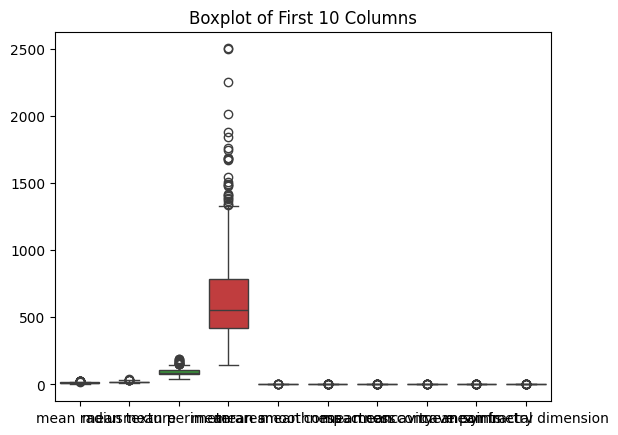

In [ ]:
# Perform exploratory analysis of dataframe using seaborn
sns.boxplot(data=X.iloc[:, :10])
plt.title("Boxplot of First 10 Columns")
plt.show()

PART - 3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


PART - 4


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train.values.ravel())

SVC()

PART - 5

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
# Generate the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114




In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()

Confusion Matrix:
[[37  6]
 [ 0 71]]



PART 6 - Improve the Accuracy of Model using GridSearchCV Model


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# Print best parameters
print("Best Parameters:", grid.best_params_)
print()

Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}



In [ ]:
# Predict using the best model
grid_predictions = grid.predict(X_test)

In [ ]:
# Generate the classification report and confusion matrix using the best model
print("Classification Report (After GridSearchCV):")
print(classification_report(y_test, grid_predictions))
print()

Classification Report (After GridSearchCV):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114




In [ ]:
print("Confusion Matrix (After GridSearchCV):")
print(confusion_matrix(y_test, grid_predictions))

Confusion Matrix (After GridSearchCV):
[[39  4]
 [ 2 69]]
